In [1]:
from utils import *
import pandas as pd
import numpy as np

# Getting all the processed data
combined_df = load_from_pickle("unprocessed_data") # Original and untouched

clustered_data_load= load_from_pickle("direct_clustered_data") # Clustering performed without applying PCA first
clustered_data_1= clustered_data_load["cir_data_pca"]

clustered_data_load2 = load_from_pickle("pca_clustered_data") # Clustering performed but WITH PCA applied first
clustered_data_2 = clustered_data_load2["cir_data_pca"]

dbscan_data_1 = load_from_pickle("8_features_DBSCAN_data") # DBSCAN with Method 1: Drop all CIR columns, then PCA
dbscan_data_2 = load_from_pickle("direct_PCA_DBSCAN_data")  # DBSCAN with Method 2: Apply PCA directly
dbscan_data_3 = load_from_pickle("unscaled_DBSCAN_data") # DBSCAN with Method 3: DF Without PCA

dataset_1 = load_from_pickle("dataset_1")
dataset_2 = load_from_pickle("dataset_2")
dataset_3 = load_from_pickle("dataset_3")
dataset_4 = load_from_pickle("dataset_4")

Supervised Learning using Support Vector Machines

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Select the features to be used for Support Vector Classification
X = combined_df[['RANGE', 'FP_AMP1', 'CIR_PWR']]
Y = combined_df['NLOS']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3)

In [3]:
# Create a SVM Classifier with the kernel of radial basis function (RBF) for non-linear hyperplane
clf = SVC(kernel = 'rbf')

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm.pkl', clf, complete_path=False)

In [4]:
""" SVM Model Performance """
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.7956349206349206
Precision: 0.810245347173852
Recall: 0.7966084827654448
F1 Score: 0.7935540439657667
Mean Squared Error (MSE): 0.20436507936507936
Matthews Correlation Coefficient (MCC): 0.6067005907703565
Cohen's Kappa: 0.5920443710874547
Hamming Loss: 0.20436507936507936

Confusion Matrix:
 [[5645  598]
 [1977 4380]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.90      0.81      6243
         1.0       0.88      0.69      0.77      6357

    accuracy                           0.80     12600
   macro avg       0.81      0.80      0.79     12600
weighted avg       0.81      0.80      0.79     12600





Confusion Matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying misclassifications, and improving predictive accuracy.

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/Basic-Confusion-matrix.png)

True Positive
- The predicted value matches the actual value, or the predicted class matches the actual class

True Negative
- The predicted value matches the actual value, or the predicted class matches the actual class

False Positive
- The predicted value was falsely predicted
- The actual value was negative, but the model predicted a positive value

False Negative
- The predicted value was falsely predicted
- The actual value was positive, but the model predicted a negative value

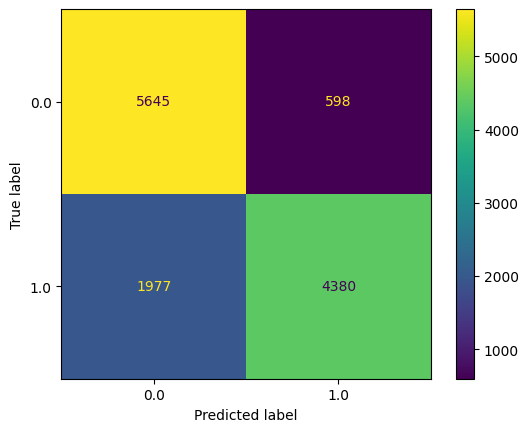

In [5]:
import matplotlib.pyplot as plt

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

Random Forest?

With Original (70,30)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = combined_df.drop('NLOS', axis=1)
y = combined_df['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/random_forest.pkl', clf, complete_path=False)

In [7]:
""" Random Forest Model Performance """
y_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.8754761904761905
Precision: 0.8789487993318965
Recall: 0.875859527559055
F1 Score: 0.8752629203979323
Mean Squared Error (MSE): 0.12452380952380952
Matthews Correlation Coefficient (MCC): 0.7548020049945755
Cohen's Kappa: 0.7511313983012975
Hamming Loss: 0.12452380952380952

Confusion Matrix:
 [[5776  474]
 [1095 5255]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6250
         1.0       0.92      0.83      0.87      6350

    accuracy                           0.88     12600
   macro avg       0.88      0.88      0.88     12600
weighted avg       0.88      0.88      0.88     12600





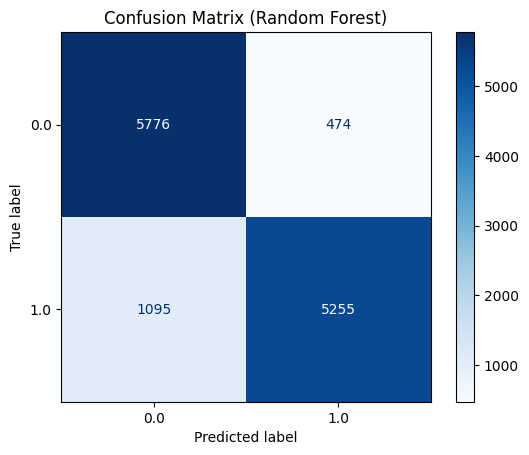

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = dataset_3.drop('NLOS', axis=1)
y = dataset_3['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
y_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.921984126984127
Precision: 0.9221871407460105
Recall: 0.922012850473412
F1 Score: 0.9219778516955676
Mean Squared Error (MSE): 0.07801587301587301
Matthews Correlation Coefficient (MCC): 0.8441999732277737
Cohen's Kappa: 0.843976367668862
Hamming Loss: 0.07801587301587301

Confusion Matrix:
 [[5865  419]
 [ 564 5752]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      6284
         1.0       0.93      0.91      0.92      6316

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600





In [10]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = dataset_4.drop('NLOS', axis=1)
y = dataset_4['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
y_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.9043650793650794
Precision: 0.90525186653715
Recall: 0.9044251331023955
F1 Score: 0.9043214701807997
Mean Squared Error (MSE): 0.09563492063492063
Matthews Correlation Coefficient (MCC): 0.8096765775648473
Cohen's Kappa: 0.8087521312744115
Hamming Loss: 0.09563492063492063

Confusion Matrix:
 [[5832  452]
 [ 753 5563]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6284
         1.0       0.92      0.88      0.90      6316

    accuracy                           0.90     12600
   macro avg       0.91      0.90      0.90     12600
weighted avg       0.91      0.90      0.90     12600





In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dataset_3.drop('NLOS', axis=1) #features
y = dataset_3['NLOS'] # target

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.9114285714285715
Precision: 0.9118990787748804
Recall: 0.911271363217776
F1 Score: 0.9113731796658626
Mean Squared Error (MSE): 0.08857142857142856
Matthews Correlation Coefficient (MCC): 0.8231702026577279
Cohen's Kappa: 0.8227875337200196
Hamming Loss: 0.08857142857142856

Confusion Matrix:
 [[3933  308]
 [ 436 3723]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      4241
         1.0       0.92      0.90      0.91      4159

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400





With DB_SCAN_3 (70,30)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = dbscan_data_3.drop('NLOS', axis=1)
y = dbscan_data_3['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
y_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.9181746031746032
Precision: 0.9185739130224309
Recall: 0.9183061417322835
F1 Score: 0.9181675472131128
Mean Squared Error (MSE): 0.08182539682539683
Matthews Correlation Coefficient (MCC): 0.8368800119161588
Cohen's Kappa: 0.8363836280349184
Hamming Loss: 0.08182539682539683

Confusion Matrix:
 [[5843  407]
 [ 624 5726]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      6250
         1.0       0.93      0.90      0.92      6350

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600





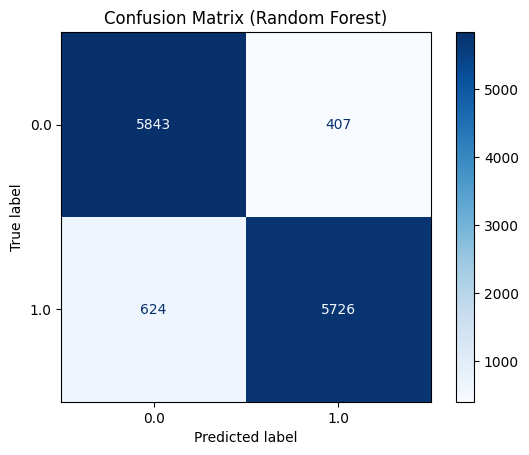

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Gradient Boost Classification

Classification result with original Datasets combined (80,20)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = combined_df.drop('NLOS', axis=1) #features
y = combined_df['NLOS'] # target

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.9066666666666666
Precision: 0.9074050130377685
Recall: 0.9067335735812888
F1 Score: 0.9066336338156827
Mean Squared Error (MSE): 0.09333333333333334
Matthews Correlation Coefficient (MCC): 0.8141383097429653
Cohen's Kappa: 0.8133568541787506
Hamming Loss: 0.09333333333333334

Confusion Matrix:
 [[3887  300]
 [ 484 3729]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4187
         1.0       0.93      0.89      0.90      4213

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400





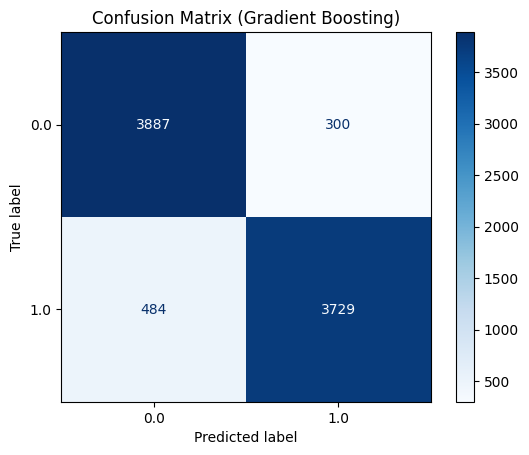

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

Classification with DBSCAN data 

DB_SCAN_2 (70:30)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_2.drop('NLOS', axis=1) #features
y = dbscan_data_2['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.858015873015873
Precision: 0.8646632324608736
Recall: 0.8585530708661417
F1 Score: 0.8574877905948681
Mean Squared Error (MSE): 0.141984126984127
Matthews Correlation Coefficient (MCC): 0.7231904917262669
Cohen's Kappa: 0.7163237131850941
Hamming Loss: 0.141984126984127

Confusion Matrix:
 [[5789  461]
 [1328 5022]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      6250
         1.0       0.92      0.79      0.85      6350

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.87      0.86      0.86     12600





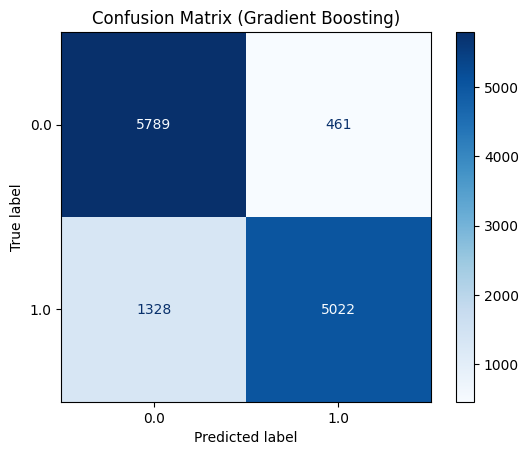

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

DB_SCAN 3 (70:30)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_3.drop('NLOS', axis=1) #features
y = dbscan_data_3['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.9086507936507936
Precision: 0.9093574857279588
Recall: 0.9088233070866142
F1 Score: 0.9086315202883783
Mean Squared Error (MSE): 0.09134920634920635
Matthews Correlation Coefficient (MCC): 0.8181806184357232
Cohen's Kappa: 0.8173551980837068
Hamming Loss: 0.09134920634920635

Confusion Matrix:
 [[5816  434]
 [ 717 5633]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6250
         1.0       0.93      0.89      0.91      6350

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600





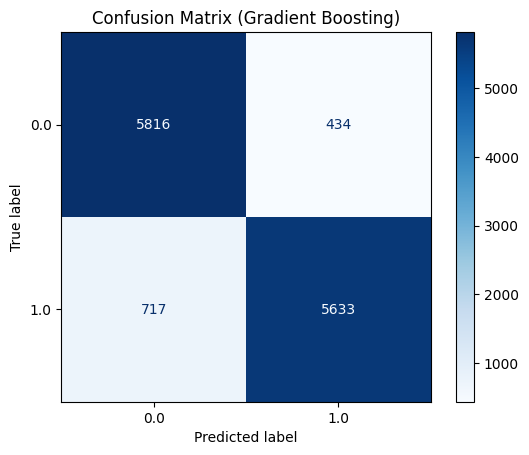

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

DB_SCAN_1 (70:30)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_1.drop('NLOS', axis=1) #features
y = dbscan_data_1['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.8554761904761905
Precision: 0.8619856529514969
Recall: 0.8560094488188976
F1 Score: 0.8549470698035506
Mean Squared Error (MSE): 0.14452380952380953
Matthews Correlation Coefficient (MCC): 0.717970229988991
Cohen's Kappa: 0.7112473902324534
Hamming Loss: 0.14452380952380953

Confusion Matrix:
 [[5770  480]
 [1341 5009]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      6250
         1.0       0.91      0.79      0.85      6350

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.85     12600
weighted avg       0.86      0.86      0.85     12600





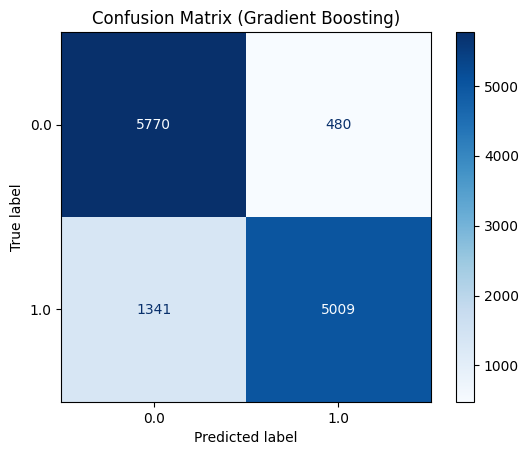

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()